In [1]:
###Fishstore Model by Sara Billey and Tim Chartier
import math
import numpy
from  random import *
import matplotlib.pyplot as plt

In [2]:
###Simple Fishstore Model=First Pass
a = 1/3                 # probability of a customer each day
days_for_delivery = 2   # days from order to delivery of new tanks

stock = 1               # number of tanks in stock
deliv = -1              # number of days until delivery of tank on order,          		     #      -1 means none on order

total_cust = 0
total_sold = 0
total_lost = 0

print( "week    weekday    stock   customers    sold    lost \n")
for week in range(3):
    for weekday in range(7):
        sold = 0
        lost = 0
        if (deliv == 0):
            stock = stock+1   # a new tank is delivered

        if (deliv >= 0):
             deliv = deliv-1   # days till next delivery

        random_num = random()  # generate random number in [0,1]
        if (random_num < a):   # use this number to tell if a customer arrived
            customers = 1
        else:
            customers = 0
        if (customers==1):
            if (stock>0):             # we have a tank to sell the customer
                sold = sold+1
                stock = stock-1
                if (deliv < 0):
                    deliv = days_for_delivery  # we sold a tank and now order another 
            else:
                lost = lost+1      # we didn't have a tank and lost a customer
#Notice the indentations!  They matter in Python and for the accuracy of this experiment.
                
# keep track of total statistics:
        total_cust = total_cust + customers
        total_sold = total_sold + sold
        total_lost = total_lost + lost

      # display results for this day
        print (week, "\t  ", weekday,"\t    ", stock,"\t      ", customers,"\t ", sold,"\t ", lost)
       # endloop on weekday
# endloop on week 
print('\n totals over entire simulation:')
print ('customers   sold       lost')
print(week,total_cust, "\t     ", total_sold, "\t", total_lost)


week    weekday    stock   customers    sold    lost 

0 	   0 	     1 	       0 	  0 	  0
0 	   1 	     1 	       0 	  0 	  0
0 	   2 	     0 	       1 	  1 	  0
0 	   3 	     0 	       0 	  0 	  0
0 	   4 	     0 	       0 	  0 	  0
0 	   5 	     1 	       0 	  0 	  0
0 	   6 	     0 	       1 	  1 	  0
1 	   0 	     0 	       0 	  0 	  0
1 	   1 	     0 	       0 	  0 	  0
1 	   2 	     0 	       1 	  1 	  0
1 	   3 	     0 	       1 	  0 	  1
1 	   4 	     0 	       0 	  0 	  0
1 	   5 	     1 	       0 	  0 	  0
1 	   6 	     1 	       0 	  0 	  0
2 	   0 	     0 	       1 	  1 	  0
2 	   1 	     0 	       1 	  0 	  1
2 	   2 	     0 	       0 	  0 	  0
2 	   3 	     1 	       0 	  0 	  0
2 	   4 	     1 	       0 	  0 	  0
2 	   5 	     0 	       1 	  1 	  0
2 	   6 	     0 	       0 	  0 	  0

 totals over entire simulation:
customers   sold       lost
2 7 	      5 	 2


In [3]:
## Some common statistical tools:
def mean(alist):
    return sum(i for i in alist)/len(alist)
def myvariance(alist):
    mu = mean(alist)
    return sum((i-mu)**2 for i in alist)/len(alist)
def mystdev(alist):   
    return float(numpy.sqrt(myvariance(alist)))

In [4]:
# Test these functions
A=[3,6,1,2]
mean(A), myvariance(A), mystdev(A)

(3.0, 3.5, 1.8708286933869707)

In [5]:
###############################################################################
#Second pass at Python program for Monte Carlo simulation of the fish tank modeling problem.
###############################################################################

def fishstore_simulator(nsim, orderFreq):  # number of different simulations to do

    # set fixed parameters:  
    nweeks = 104      # number of weeks in each simulation
    ndays = 7*nweeks  # number of days in each simulation

    a = 1/7   # probability of a customer each day

    days_for_delivery = 5   # days from order to delivery of new tanks

    # set strategy  parameters:
    order_when_out = 1        # = 1  ==>  order a new tank when stock==0
                              # = 0  ==>  don't order when out of tanks

    fixed_delivery =  orderFreq     # >0   ==>  standing order for a new tank
                             #           every so many days

    # profits and losses:
    saleprofit = 20        # profit from selling one tank
    lostloss = 10          # loss from losing a customer
    overstockloss = .50    # cost of each tank overstock per night

    # initialize:
    profit = [0 for i in range(nsim)]
    fraction_served = [0 for i in range(nsim)]

    # print column headings:

    stock_record = [0 for i in range(ndays)]     #   was numeric(0)

    for sim in range(nsim):

        # initialize:
        random_nums = [random() for i in range(ndays)]   # array of random numbers to use each day
        total_cust = 0
        total_sold = 0
        total_lost = 0
        stock = 1      # number of tanks in stock
        deliv =1       # number of days until delivery of tank on order
                       # -1 means none on order
        overstock = 0  # increment every night by number of excess tanks in stock


          # main loop for a single simulation:

        day = -1
        for week in range(nweeks):
            for weekday in range(7):

                day = day+1              # day in the simulation
                sold = 0
                lost = 0
                if (deliv == 0): 
                      stock = stock+1   # a new tank is delivered
                                # at the beginning of the day
                if (deliv >= 0):
                    deliv = deliv-1   # days till next delivery

                if numpy.mod(day, fixed_delivery) == 0 :
                    # A new tank is delivered every so many days regardless of stock
                    stock = stock+1

                # use random number to decide how many customers arrived.  Here assume 0 or 1 customers per day:
                if random_nums[day] < a:
                    customers = 1
                else:
                    customers = 0

                if  customers==1:
                    if stock>0 :            # we have a tank to sell the customer
                        sold = sold+1
                        stock = stock-1

                    else:
                        lost = lost+1      # we didn't have a tank and lost a customer

                if (order_when_out==1) & (stock==0) & (deliv < 0):
                    # none in stock and none on order
                    deliv = days_for_delivery  # order another

                if (stock > 1):
                    overstock = overstock + (stock - 1)


                # keep track of total statistics:
                total_cust = total_cust + customers
                total_sold = total_sold + sold
                total_lost = total_lost + lost
                stock_record[day] = stock  # keep track of stock on each day
    # end of day and week loops

        fraction_served[sim] = total_sold / total_cust

        profit[sim] = total_sold*saleprofit - total_lost*lostloss - overstock*overstockloss

        # output total statistics:

     # end loop on sim


    # compute and print average profit over all simulations:

    average_profit = mean(profit)
    average_served = mean(fraction_served)

    # standard deviation:

    standard_deviation = mystdev(profit)
    return [profit,average_profit,standard_deviation,average_served]

In [9]:
x = fishstore_simulator(5000,14)

In [10]:
x[3]

0.8324404348557835

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   3.,   0.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,
          3.,   3.,   5.,   4.,   3.,   4.,   5.,   3.,   6.,  10.,  14.,
         15.,  17.,  27.,  20.,  33.,  25.,  37.,  37.,  45.,  69.,  80.,
         96., 112.,  96., 125., 139., 143., 176., 156., 197., 209., 210.,
        210., 247., 231., 237., 195., 188., 195., 173., 175., 153., 149.,
        125., 117.,  81.,  84.,  66.,  57.,  38.,  38.,  18.,  20.,  15.,
         16.,  11.,   5.,   5.,   4.,   3.,   1.,   4.,   3.,   1.,   0.,
          1.]),
 array([ 426.   ,  439.955,  453.91 ,  467.865,  481.82 ,  495.775,
         509.73 ,  523.685,  537.64 ,  551.595,  565.55 ,  579.505,
         593.46 ,  607.415,  621.37 ,  635.325,  649.28 ,  663.235,
         677.19 ,  691.145,  705.1  ,  719.055,  733.01 ,  746.965,
         760.92 ,  774.875,  788.83 ,  802.785

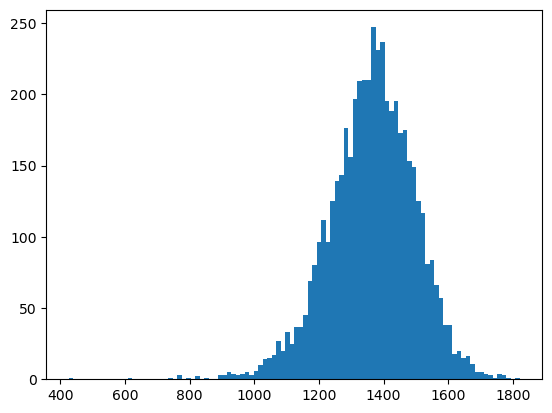

In [197]:
plt.hist(x[0],bins = 100)

In [198]:
fishstore_simulator(10,5) 

[[-7738.5,
  -5572.0,
  -6693.0,
  -7644.0,
  -5106.5,
  -5627.5,
  -3288.0,
  -11452.5,
  -5911.0,
  -4825.5],
 -6385.85,
 2104.9683851545133,
 0.990909090909091]

In [11]:

d = {}
for x in range(1, 21):
    d["orderEvery{0}days".format(x)] = fishstore_simulator(2000,x)

average profit -112092.62525
standard deviation 2162.0334973555437
fraction served 1.0


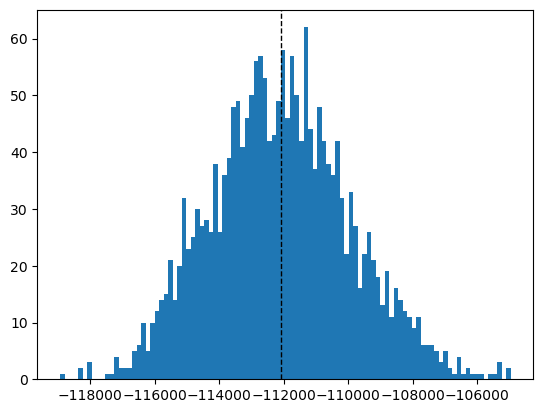

In [12]:
plt.hist(d["orderEvery1days"][0], bins = 100)
plt.axvline(d["orderEvery1days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery1days"][1]) + "\nstandard deviation " + str(d["orderEvery1days"][2]) +"\nfraction served " +str(d["orderEvery1days"][3]))

average profit -45672.9365
standard deviation 2123.329687711675
fraction served 0.9999945054945054


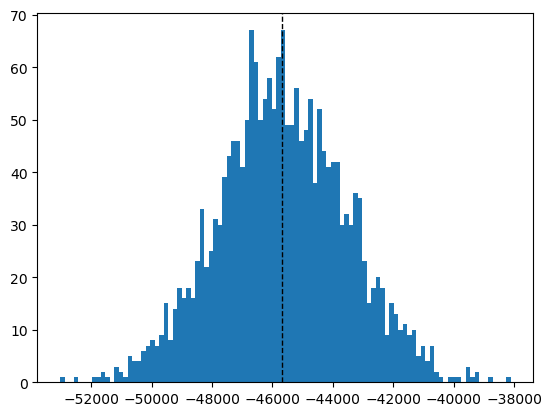

In [13]:
plt.hist(d["orderEvery2days"][0], bins = 100)
plt.axvline(d["orderEvery2days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery2days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery2days"][2]) 
      +"\nfraction served " +str(d["orderEvery2days"][3]))

average profit -23735.434
standard deviation 2154.1694850670415
fraction served 0.999994623655914


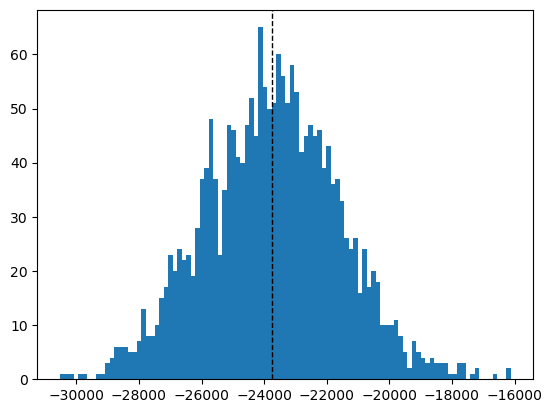

In [14]:
plt.hist(d["orderEvery3days"][0], bins = 100)
plt.axvline(d["orderEvery3days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery3days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery3days"][2]) 
      +"\nfraction served " +str(d["orderEvery3days"][3]))

average profit -12643.827
standard deviation 2133.1837429816023
fraction served 0.9999161490602912


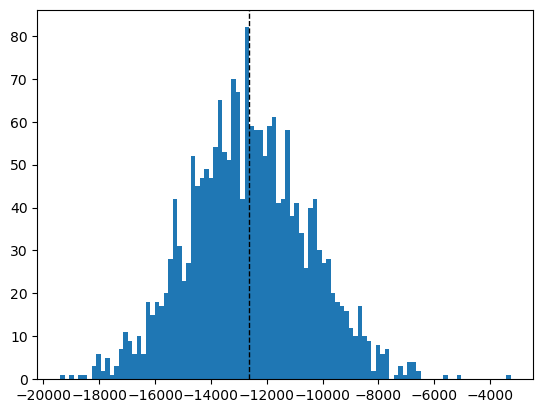

In [15]:
plt.hist(d["orderEvery4days"][0], bins = 100)
plt.axvline(d["orderEvery4days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery4days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery4days"][2]) 
      +"\nfraction served " +str(d["orderEvery4days"][3]))

average profit -6077.67175
standard deviation 2060.9727929734872
fraction served 0.9994482111756564


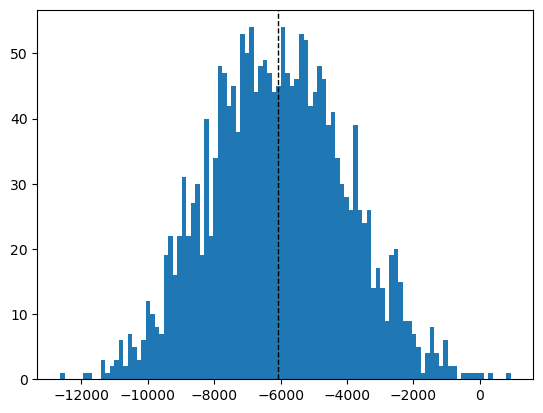

In [16]:
plt.hist(d["orderEvery5days"][0], bins = 100)
plt.axvline(d["orderEvery5days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery5days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery5days"][2]) 
      +"\nfraction served " +str(d["orderEvery5days"][3]))

average profit -1973.63375
standard deviation 1779.6952439212566
fraction served 0.9973550304358967


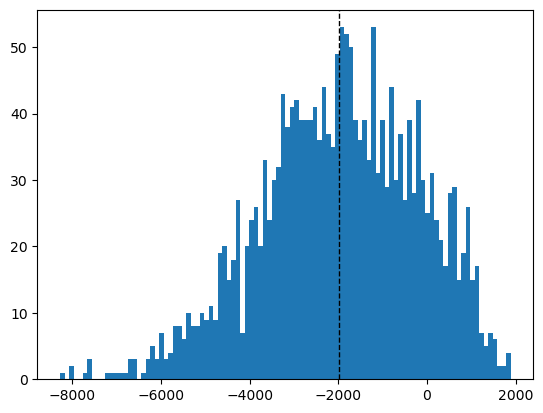

In [17]:
plt.hist(d["orderEvery6days"][0], bins = 100)
plt.axvline(d["orderEvery6days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery6days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery6days"][2]) 
      +"\nfraction served " +str(d["orderEvery6days"][3]))

average profit 202.22
standard deviation 1197.1358107374465
fraction served 0.9857684600982841


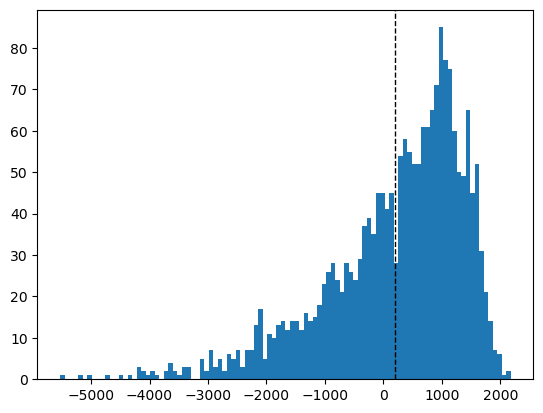

In [18]:
plt.hist(d["orderEvery7days"][0], bins = 100)
plt.axvline(d["orderEvery7days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery7days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery7days"][2]) 
      +"\nfraction served " +str(d["orderEvery7days"][3]))

average profit 1070.03025
standard deviation 643.3319479164213
fraction served 0.9635945036709611


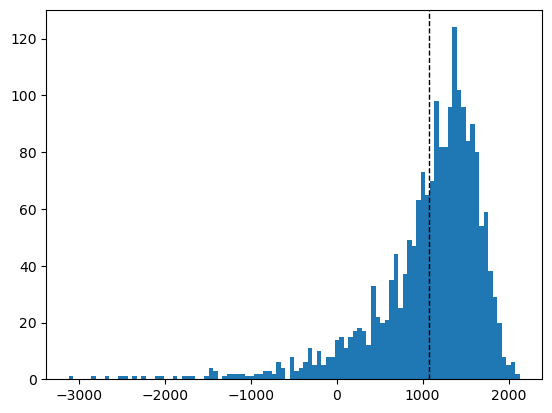

In [19]:
plt.hist(d["orderEvery8days"][0], bins = 100)
plt.axvline(d["orderEvery8days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery8days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery8days"][2]) 
      +"\nfraction served " +str(d["orderEvery8days"][3]))

average profit 1327.1315
standard deviation 378.3612182263794
fraction served 0.9370455402183137


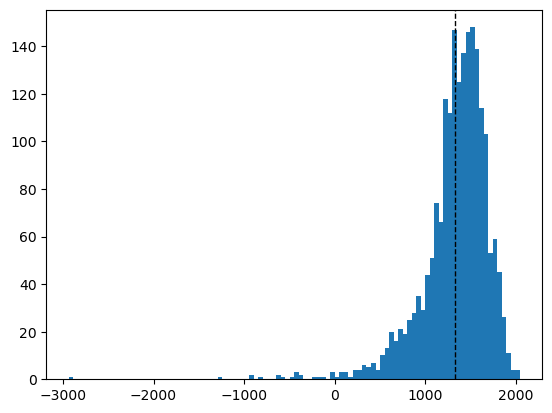

In [20]:
plt.hist(d["orderEvery9days"][0], bins = 100)
plt.axvline(d["orderEvery9days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery9days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery9days"][2]) 
      +"\nfraction served " +str(d["orderEvery9days"][3]))

average profit 1408.25525
standard deviation 232.2955503715848
fraction served 0.9109929059794191


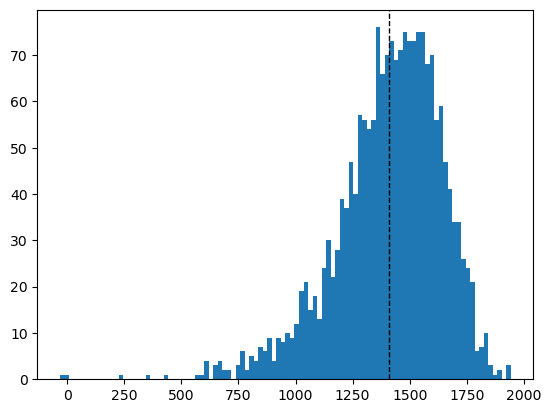

In [21]:
plt.hist(d["orderEvery10days"][0], bins = 100)
plt.axvline(d["orderEvery10days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery10days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery10days"][2]) 
      +"\nfraction served " +str(d["orderEvery10days"][3]))

average profit 1425.43825
standard deviation 186.42500854750543
fraction served 0.8875654834409088


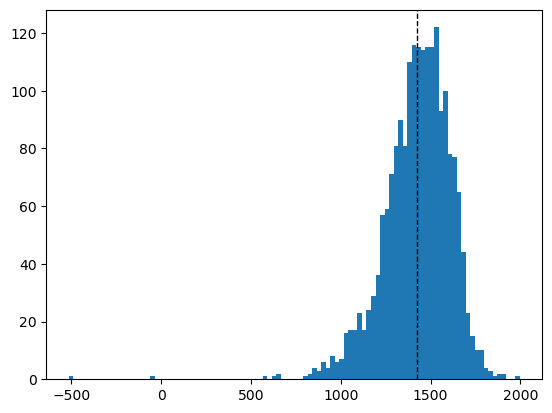

In [22]:
plt.hist(d["orderEvery11days"][0], bins = 100)
plt.axvline(d["orderEvery11days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery11days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery11days"][2]) 
      +"\nfraction served " +str(d["orderEvery11days"][3]))

average profit 1412.129
standard deviation 157.7034800155025
fraction served 0.8666199450623274


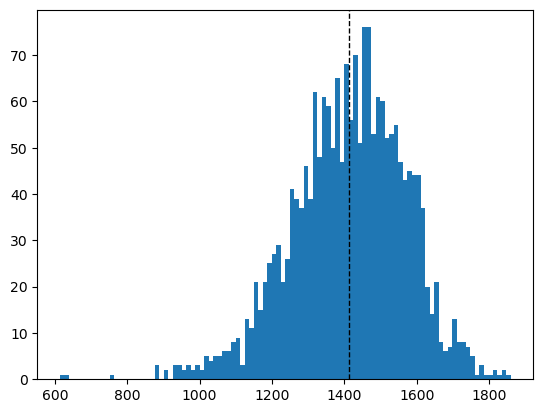

In [23]:
plt.hist(d["orderEvery12days"][0], bins = 100)
plt.axvline(d["orderEvery12days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery12days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery12days"][2]) 
      +"\nfraction served " +str(d["orderEvery12days"][3]))

average profit 1395.5465
standard deviation 139.3549715214711
fraction served 0.8480162443339381


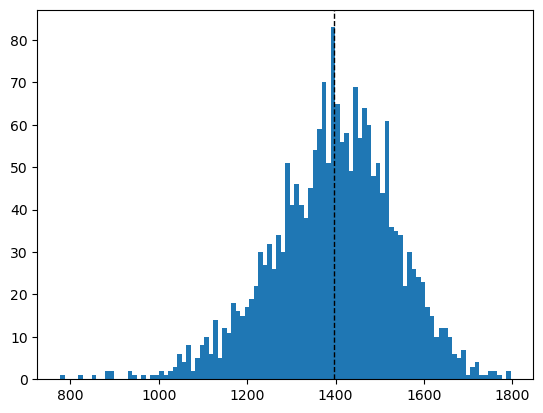

In [24]:
plt.hist(d["orderEvery13days"][0], bins = 100)
plt.axvline(d["orderEvery13days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery13days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery13days"][2]) 
      +"\nfraction served " +str(d["orderEvery13days"][3]))

average profit 1370.46325
standard deviation 131.53166073017383
fraction served 0.8332284260375372


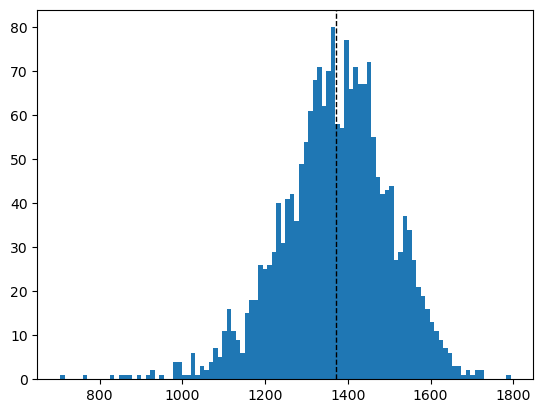

In [25]:
plt.hist(d["orderEvery14days"][0], bins = 100)
plt.axvline(d["orderEvery14days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery14days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery14days"][2]) 
      +"\nfraction served " +str(d["orderEvery14days"][3]))

average profit 1342.45825
standard deviation 125.97524015431557
fraction served 0.819406810931023


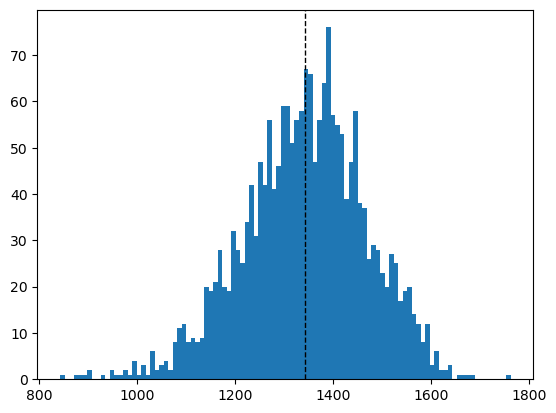

In [26]:
plt.hist(d["orderEvery15days"][0], bins = 100)
plt.axvline(d["orderEvery15days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery15days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery15days"][2]) 
      +"\nfraction served " +str(d["orderEvery15days"][3]))

average profit 1317.84075
standard deviation 116.64310958834008
fraction served 0.8051491835990452


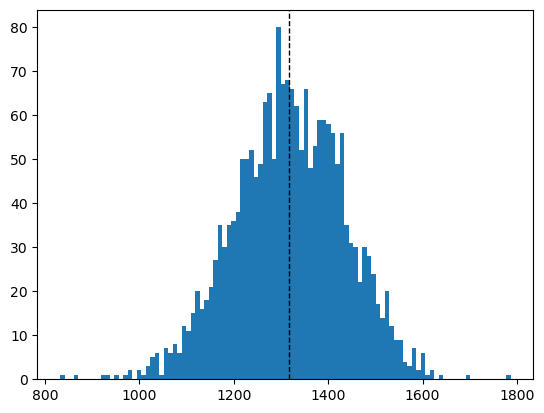

In [27]:
plt.hist(d["orderEvery16days"][0], bins = 100)
plt.axvline(d["orderEvery16days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery16days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery16days"][2]) 
      +"\nfraction served " +str(d["orderEvery16days"][3]))

average profit 1295.17625
standard deviation 113.5467450477447
fraction served 0.7932442784634727


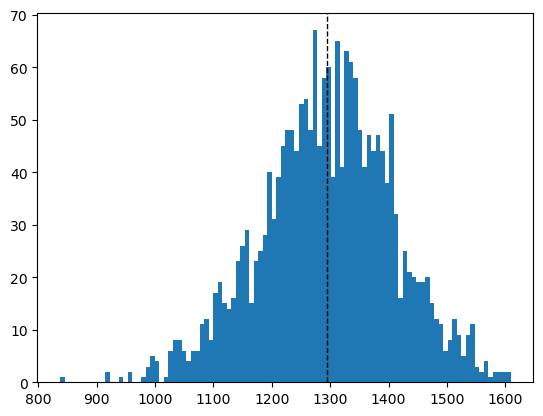

In [28]:
plt.hist(d["orderEvery17days"][0], bins = 100)
plt.axvline(d["orderEvery17days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery17days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery17days"][2]) 
      +"\nfraction served " +str(d["orderEvery17days"][3]))

average profit 1274.55525
standard deviation 110.26996337370156
fraction served 0.7846583718435971


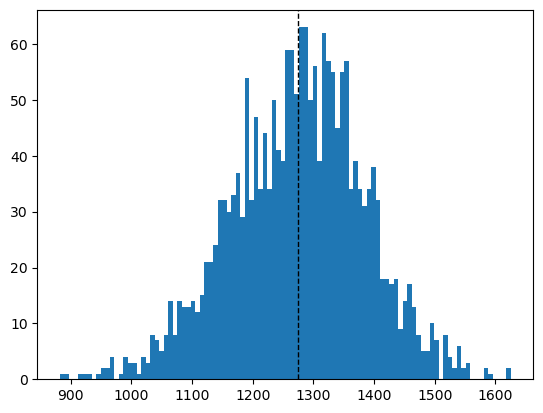

In [29]:
plt.hist(d["orderEvery18days"][0], bins = 100)
plt.axvline(d["orderEvery18days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery18days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery18days"][2]) 
      +"\nfraction served " +str(d["orderEvery18days"][3]))

average profit 1248.66575
standard deviation 107.83415229850654
fraction served 0.7724127520220013


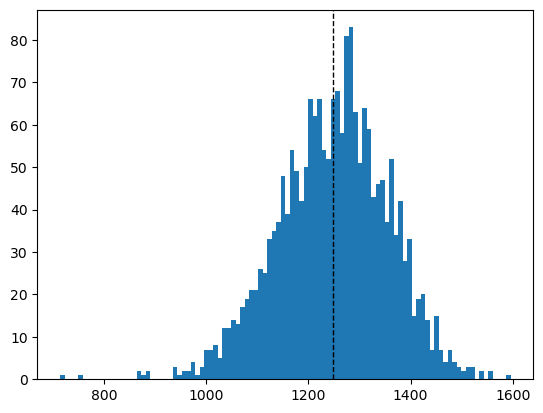

In [30]:
plt.hist(d["orderEvery19days"][0], bins = 100)
plt.axvline(d["orderEvery19days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery19days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery19days"][2]) 
      +"\nfraction served " +str(d["orderEvery19days"][3]))

average profit 1230.8965
standard deviation 101.23076379120137
fraction served 0.7645377631078247


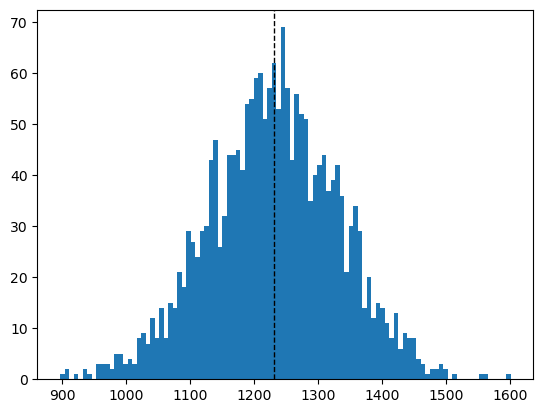

In [31]:
plt.hist(d["orderEvery20days"][0], bins = 100)
plt.axvline(d["orderEvery20days"][1],color='k', linestyle='dashed', linewidth=1)
print("average profit " +str(d["orderEvery20days"][1]) + 
      "\nstandard deviation " + str(d["orderEvery20days"][2]) 
      +"\nfraction served " +str(d["orderEvery20days"][3]))

In [32]:
data = []
for x in range(1,21):
    data.append([d[f"orderEvery{x}days"][1]])

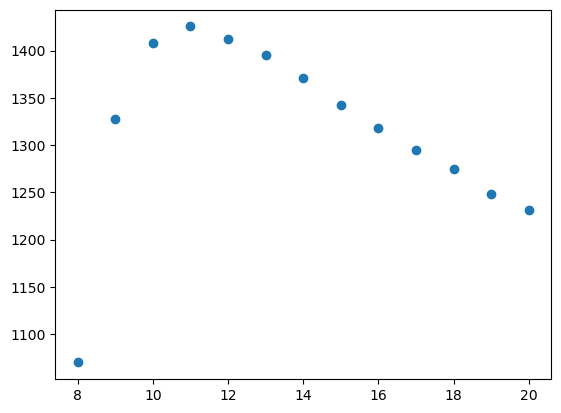

In [33]:
plt.scatter(range(1,21)[7:],data[7:])